# Exploring Diction and Topics in Lucan

Patrick J. Burns
Institute for the Study of the Ancient World

Follow along at: https://github.com/diyclassics/ll-experiments

Necessary Python packages
- pip install jupyter
- pip install numpy pandas matplotlib sklearn
- pip install cltk

An iPython notebook to demonstrate the use of the Classical Language Toolkit for developing a natural language processing workflow for Latin texts and using this workflow for the basis of exploratory data analysis of diction and topics in these texts. Based on Allen Riddell's [»Text Analysis with Topic Models for the Humanities and Social Sciences«](https://de.dariah.eu/tatom/index.html).

Presented at ISAW Intro to Digital Humanities course, 12/4/17  
Presented at Yale University Classics Department, 5/18/17  
  
Last updated 11/29/17

## Set up corpora

In [1]:
## Set up corpora

## You will need the models/datasets that the new lemmatizer uses
## Note that this will generate an error if this and older 
## version of this corpus is already installed. If that happens,
## backup the old version, move or delete it, and reimport the corpus.

#from cltk.corpus.utils.importer import CorpusImporter

#corpus_importer = CorpusImporter('latin')
#corpus_importer.list_corpora

#corpus_importer.import_corpus('latin_models_cltk')

## We will be using the Latin Library corpus for today's workshop,
## so we will also need to import that as well.

#corpus_importer.import_corpus('latin_text_latin_library')

## Imports

In [2]:
# In general, you want to keep imports at the front of a project, but for
# the purposes of today's workshop, it seemed better to introduce them on
# an as-needed basis. Still, here is an example of what I would usually do
# at the beginning of a notebook.

from pprint import pprint 

# pprint allows for cleaner presentation of Python objects, esp. long strings,
# lists (and nested lists), dictionaries, etc.

## Get corpus

In [3]:
# Get the Latin Library corpus

from cltk.corpus.latin import latinlibrary

# The CLTK Latin Library corpus is a web-scraped collection of plaintext files
# from thelatinlibrary.com.

# We can access the individual files as follows...

files = latinlibrary.fileids()
print(files[:50]) # The first 50 files in the corpus

# Note the [:50] slice to limit our list to the first 50 items.

len(files)

['12tables.txt', '1644.txt', 'abbofloracensis.txt', 'abelard/dialogus.txt', 'abelard/epistola.txt', 'abelard/historia.txt', 'addison/barometri.txt', 'addison/burnett.txt', 'addison/hannes.txt', 'addison/machinae.txt', 'addison/pax.txt', 'addison/praelium.txt', 'addison/preface.txt', 'addison/resurr.txt', 'addison/sphaer.txt', 'adso.txt', 'aelredus.txt', 'agnes.txt', 'alanus/alanus1.txt', 'alanus/alanus2.txt', 'albertanus/albertanus.arsloquendi.txt', 'albertanus/albertanus.liberconsol.txt', 'albertanus/albertanus.sermo.txt', 'albertanus/albertanus.sermo1.txt', 'albertanus/albertanus.sermo2.txt', 'albertanus/albertanus.sermo3.txt', 'albertanus/albertanus.sermo4.txt', 'albertanus/albertanus1.txt', 'albertanus/albertanus2.txt', 'albertanus/albertanus3.txt', 'albertanus/albertanus4.txt', 'albertofaix/hist1.txt', 'albertofaix/hist10.txt', 'albertofaix/hist11.txt', 'albertofaix/hist12.txt', 'albertofaix/hist2.txt', 'albertofaix/hist3.txt', 'albertofaix/hist4.txt', 'albertofaix/hist5.txt', 'al

2152

## Get corpus files

In [10]:
# We can iterate over the list of files to retrieve specific files. Today
# we want to work with book 1 of Propertius and book 1 of Tibullus. We
# can isolate these files by using:
# 1. list comprehension
# 2. testing for membership with 'in'

# NB: Python designates lists with square brackets, i.e. [...]; list comprehensions
# build lists in place with the following syntax...

lucan_files = [file for file in files if 'lucan/' in file]

In [7]:
# Here are all the files in the Latin Library with 'prop' in the filename. We
# are looking for 'propertius1.txt' and can assign it to a variable as follows...

propertius_file = 'propertius1.txt'

In [73]:
# Repeat for Tibullus

print([file for file in files if 'tib' in file])
print('\n')
pprint([file for file in files if 'tib' in file])

tibullus_file = 'tibullus1.txt'

['erasmus/antibarb.txt', 'suetonius/suet.tib.txt', 'suetonius/suet.tibullus.txt', 'tibullus1.txt', 'tibullus2.txt', 'tibullus3.txt']


['erasmus/antibarb.txt',
 'suetonius/suet.tib.txt',
 'suetonius/suet.tibullus.txt',
 'tibullus1.txt',
 'tibullus2.txt',
 'tibullus3.txt']


## Get texts

In [74]:
# Use raw function for plaintextcorpus reader to get the contents of
# the file as a string...

propertius_raw = latinlibrary.raw(propertius_file)

In [75]:
# Here is a preview of the contents...

print(propertius_raw[:500])

SEXTI PROPERTI ELEGIARVM LIBER PRIMVS

1 2 3 4 5 6 7 8a 8b 9 10 11 12 13 14 15 16 17 18 19 20 21 22

I

Cynthia prima suis miserum me cepit ocellis,
    contactum nullis ante cupidinibus.
tum mihi constantis deiecit lumina fastus
    et caput impositis pressit Amor pedibus,
donec me docuit castas odisse puellas                 5
    improbus, et nullo vivere consilio.
ei mihi, iam toto furor hic non deficit anno,
    cum tamen adversos cogor habere deos.
Milanion nullos fugiendo, Tulle, labores



In [76]:
# And a bit of the end...

print(propertius_raw[-500:]) # Note the negative slice

XXII

Qualis et unde genus, qui sint mihi, Tulle, Penates,
    quaeris pro nostra semper amicitia.
si Perusina tibi patriae sunt nota sepulcra,
    Italiae duris funera temporibus,
cum Romana suos egit discordia cives—                 5
    sic mihi praecipue, pulvis Etrusca, dolor,
tu proiecta mei perpessa's membra propinqui,
    tu nullo miseri contegis ossa solo—
proxima suppositos contingens Umbria campos
    me genuit terris fertilis uberibus.

Propertius	The Latin Library	The Classics Page


In [77]:
# Get the Tibullus texts

tibullus_raw = latinlibrary.raw(tibullus_file)

## Preprocessing

In [23]:
# Imports for preprocessing

import re # Regex module, useful for pattern matching
import html # Useful for handling entities

# Import/load a CLTK tool for normalizing i/j and u/v in Latin texts
from cltk.stem.latin.j_v import JVReplacer
replacer = JVReplacer()

In [45]:
# Preprocess texts

# I've written the following preprocessing function for today's workshop. It's
# pretty specific in a few cases—more so than I would normally would use, e.g. '8a'
# and '8b'.

# Still the goal of preprocessing is to make all of the texts we are working with
# for this experiment as uniform as possible, so that functions/processes further along
# encounter consistent data. GIGO, as they say. E.g., for today we want
# 'verbum' and 'uerbum' to be treated as the same word. For a different experiment, 
# you might not and need to make different editorial choices.


def preprocess(text):

    # Remove Latin Library-specific paratexts with regex
    
    remove_list = [r'\bThe Latin Library\b',
                   r'\bThe Classics Page\b',
                   r'\bM. ANNAEI LVCANI BELLI CIVILIS LIBER .+?\b',
                   r'\bLucan Liber .+?\b',
                   r'\bLucan\b',
                  ]
    
    for pattern in remove_list:
        text = re.sub(pattern, '', text)

    # Remove html entities and related html artifacts
    
    text = html.unescape(text) # Handle html entities
    text = re.sub(r'&nbsp;?', ' ',text) #&nbsp; stripped incorrectly in corpus?
    text = re.sub(r'\x00',' ',text) #Another space problem?
    text = re.sub(r' \xa0 ', '    ', text)
    
    # Remove roman numeral headings; must be before lower & replacer
    text = re.sub(r'\b(M{1,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})|M{0,4}(CM|C?D|D?C{1,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,4})|M{0,4}(CM|CD|D?C{0,3})(XC|X?L|L?X{1,3})(IX|IV|V?I{0,3})|M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|I?V|V?I{1,3}))\b',' ',text)
    
    # Lowercase text
    text = text.lower()

    # Normalize text
    text = replacer.replace(text) #Normalize u/v & i/j
    
    # Remove punctuation with translate
    punctuation ="\"#$%&\'()+,-/:;<=>@[\]^_`{|}~.?!«»—"
    translator = str.maketrans({key: " " for key in punctuation})
    text = text.translate(translator)
    
    # Remove numbers
    translator = str.maketrans({key: " " for key in '0123456789'})
    text = text.translate(translator)
    
    # Handle spacing
    text = re.sub('[ ]+',' ', text) # Remove double spaces
    text = re.sub('\t',' ', text) # Remove tabs
    text = re.sub('^\s+','', text)
    text = re.sub(' \n', '\n', text)
    text = re.sub('\n\n', '~', text)
    text = re.sub('~+', '\n\n', text)
    
    return text.strip()

In [46]:
lucan_raws = [latinlibrary.raw(file) for file in lucan_files]

In [48]:
lucan_pps = [preprocess(raw) for raw in lucan_raws]

In [51]:
lucan_trims = [text.strip() for text in lucan_pps]

## Split text into list of poems

## Set up titles

In [75]:
lucan_titles = ['Luc. 1', 'Luc. 10', 'Luc. 2', 'Luc. 3', 'Luc. 4', 
                   'Luc. 5', 'Luc. 6', 'Luc. 7', 'Luc. 8', 'Luc. 9']



In [53]:
# Set up CLTK Latin word tokenizer

from cltk.tokenize.word import WordTokenizer
word_tokenizer = WordTokenizer('latin')

In [54]:
# Here is what the same poem looks like as a list of tokens
print(word_tokenizer.tokenize(lucan_trims[0]))
print(len(word_tokenizer.tokenize(lucan_trims[0])))

['bella', 'per', 'emathios', 'plus', 'quam', 'ciuilia', 'campos', 'ius', '-que', 'datum', 'sceleri', 'canimus', 'populum', '-que', 'potentem', 'in', 'sua', 'uictrici', 'conuersum', 'uiscera', 'dextra', 'cognatas', '-que', 'acies', 'et', 'rupto', 'foedere', 'regni', 'certatum', 'totis', 'concussi', 'uiribus', 'orbis', 'in', 'commune', 'nefas', 'infestis', '-que', 'obuia', 'signis', 'signa', 'pares', 'aquilas', 'et', 'pila', 'minantia', 'pilis', 'quis', 'furor', 'o', 'ciues', 'quae', 'tanta', 'licentia', 'ferri', 'gentibus', 'inuisis', 'latium', 'praebere', 'cruorem', 'cumque', 'superba', 'foret', 'babylo', '-ne', 'spolianda', 'tropaeis', 'ausoniis', 'umbra', '-que', 'erraret', 'crassus', 'inulta', 'bella', 'geri', 'placuit', 'nullos', 'habitura', 'triumphos', 'heu', 'quantum', 'terrae', 'potuit', 'pelagi', '-que', 'parari', 'hoc', 'quem', 'ciuiles', 'hauserunt', 'sanguine', 'dextrae', 'unde', 'uenit', 'titan', 'et', 'nox', 'ubi', 'sidera', 'condit', 'quaque', 'dies', 'medius', 'flagrant

In [55]:
# Tokenize list of poems

# Again we can use list comprehensions to create orderly lists of lists of tokens.

lucan_tokens = [word_tokenizer.tokenize(poem) for poem in lucan_trims]

## Lemmatize tokens

In [93]:
# What we now want is a list of all of the lemmata, i.e. the dictionary headword, in 
# the poem. CLTK has Latin-specific lemmatizers that make automatic and 'informed' 
# decisions about which headword to pick. The accuracy of the lemmatizer we will
# use today—the backoff lemmatizer—is constantly improving and is roughly 90% at present,
# which should be sufficient for today's experiments.

In [56]:
# We need to import a data model to train the lemmatizer.

import os
from cltk.utils.file_operations import open_pickle

# Set up training sentences

rel_path = os.path.join('~/cltk_data/latin/model/latin_models_cltk/lemmata/backoff')
path = os.path.expanduser(rel_path)

# Check for presence of latin_pos_lemmatized_sents
file = 'latin_pos_lemmatized_sents.pickle'      

latin_pos_lemmatized_sents_path = os.path.join(path, file)
if os.path.isfile(latin_pos_lemmatized_sents_path):
    latin_pos_lemmatized_sents = open_pickle(latin_pos_lemmatized_sents_path)
else:
    latin_pos_lemmatized_sents = []
    print('The file %s is not available in cltk_data' % file)  

In [57]:
# Set up CLTK Latin backoff lemmatizer

from cltk.lemmatize.latin.backoff import BackoffLatinLemmatizer
lemmatizer = BackoffLatinLemmatizer(latin_pos_lemmatized_sents)

In [58]:
# This lemmatizer, while more accurate than others, can be **very** slow. So, for
# the purposes of today's workshop, we will use a 'trick' to speed it up, i.e.
# rejoin the list of tokens and process two strings rather than a list of all the tokens.

## Make one string of all files, delimited by |||
## (NB: Attempt to reduce the number of regex compiles.)

def create_lemmatized_texts(texts):
    textin = " ||| ".join(texts)
    tokens = textin.split()
    lemmas = lemmatizer.lemmatize(tokens)
    textout = " ".join(lemma[1] for lemma in lemmas)
    punctuation ="\"#$%&\'()+,-/:;<=>@[\]^_`{}~.?!«»—"
    translator = str.maketrans({key: " " for key in punctuation})
    textout = textout.translate(translator)
    translator = str.maketrans({key: " " for key in '0123456789'})
    textout = textout.translate(translator)
    textout = re.sub(r' punc ', ' ', textout)
    lemmatized_texts = textout.split('|||')
    return lemmatized_texts


In [59]:
print(create_lemmatized_texts(lucan_trims[:1]))

['bellum per emathios multus quam ciuilis campus  jus do scelus cano populus  potens in suus uictrix converro uiscera dextera cognata acies et rumpo foedus regnum certas totus concutio uis orbis in communis nefas infestus obvius signum signum par aquila  et pilum mino pila quis furor o ciuis qui tantus licentia fero gens invideo latium praebeo cruor cum  superbus sum babylon spolio tropaeum ausoniis umbro erro crassus inultus bellum gero placeo nullus habeo triumphus heu quantus terra possum pelagius paro hic qui ciuilis haurio sanguis dexter unde uenio titan et nox ubi sidus condo quisque dies medius flagro aestuo hora et qui bruma rigeo atque nescius uerus remitto astringo scythico glacial frigor pontus sub iugum iam sero  iam barbarus eo  araxes et gens siqua iaceo nasco conscius nilus tum si tantus amor bellum tu roma nefandus totus sub latias lex cum  miser orbis in tu verto manus nondum tu desum hostis at nunc semirutus pendeo qui moenia tectum urbs italia labor  ingens murus sax

In [60]:
# As noted above, rejoin list of tokens...
lucan_tokenized_texts = [' '.join(tokens) for tokens in lucan_tokens]

# ... and lemmatize.
lucan_lemmatized_texts = create_lemmatized_texts(lucan_tokenized_texts)

In [61]:
# Now let's split our lemmatized texts into a list of lemmas, first by getting
# a list of lemmas per poem...

lucan_lemmas = [text.split() for text in lucan_lemmatized_texts]
lucan_lemmas = [item for sublist in lucan_lemmas for item in sublist]

## Counting words

In [100]:
# Now that we have a list of lemmas from our authors, we can use the Counter
# object in Python to get some frequency information about "words"

from collections import Counter

# Build counter of top token counts
propertius_lemmas_counter = Counter(propertius_lemmas)
propertius_lemmas_mc = propertius_lemmas_counter.most_common(100)

running = 0

print('Top 25 lemmas in Propertius 1:\n')
print("{number:>5}  {lemma:<12}{count:<12}{percent:<12}{running:<12}".format(number="", lemma="lemma", count="COUNT", percent="Type-Tok %", running = "RUNNING %"))
for i, pair in enumerate(propertius_lemmas_mc[:25]):
    running += pair[1]
    print("{number:>5}. {lemma:<12}{count:<12}{percent:<12}{running:<12}".format(number=i+1, lemma=pair[0], count=pair[1], percent=str(round(pair[1] / len(propertius_lemmas)*100, 2))+"%", running = str(round(running / len(propertius_lemmas)*100, 2))+"%"))

Top 25 lemmas in Propertius 1:

       lemma       COUNT       Type-Tok %  RUNNING %   
    1. et          135         3.05%       3.05%       
    2. sum         124         2.81%       5.86%       
    3. tu          113         2.56%       8.42%       
    4. ego         106         2.4%        10.81%      
    5. non         84          1.9%        12.71%      
    6. qui         64          1.45%       14.16%      
    7. amor        61          1.38%       15.54%      
    8. meus        57          1.29%       16.83%      
    9. ille        51          1.15%       17.99%      
   10. neque       49          1.11%       19.1%       
   11. hic         48          1.09%       20.18%      
   12. in          47          1.06%       21.24%      
   13. possum      42          0.95%       22.19%      
   14. noster      32          0.72%       22.92%      
   15. tuus        31          0.7%        23.62%      
   16. cynthia     30          0.68%       24.3%       
   17. puella   

In [101]:
# Build counter of top token counts
tibullus_lemmas_counter = Counter(tibullus_lemmas)
tibullus_lemmas_mc = tibullus_lemmas_counter.most_common(100)

running = 0

print('Top 25 lemmas in Tibullus 1:\n')
print("{number:>5}  {lemma:<12}{count:<12}{percent:<12}{running:<12}".format(number="", lemma="lemma", count="COUNT", percent="Type-Tok %", running = "RUNNING %"))
for i, pair in enumerate(tibullus_lemmas_mc[:25]):
    running += pair[1]
    print("{number:>5}. {lemma:<12}{count:<12}{percent:<12}{running:<12}".format(number=i+1, lemma=pair[0], count=pair[1], percent=str(round(pair[1] / len(tibullus_lemmas)*100, 2))+"%", running = str(round(running / len(tibullus_lemmas)*100, 2))+"%"))

Top 25 lemmas in Tibullus 1:

       lemma       COUNT       Type-Tok %  RUNNING %   
    1. et          148         2.75%       2.75%       
    2. sum         120         2.23%       4.99%       
    3. ego         108         2.01%       6.99%       
    4. que         106         1.97%       8.97%       
    5. tu          101         1.88%       10.84%      
    6. non         68          1.26%       12.11%      
    7. hic         61          1.13%       13.24%      
    8. qui         56          1.04%       14.29%      
    9. ille        56          1.04%       15.33%      
   10. neque       48          0.89%       16.22%      
   11. in          43          0.8%        17.02%      
   12. at          38          0.71%       17.73%      
   13. cum         38          0.71%       18.43%      
   14. ipse        36          0.67%       19.1%       
   15. sed         34          0.63%       19.74%      
   16. amor        33          0.61%       20.35%      
   17. meus       

## Words as features

In [62]:
# Here we will quickly go through the kinds of exploratory data analysis available
# to us once we have preprocessed or tokenized or lemmatized texts, spec.

# - Visualizing texts by "distance" based on vocabulary
# - Visualizing automatically extracted topics based on word co-occurence

In [64]:
!pipenv install numpy pandas scikit-learn scipy

Installing numpy...
  Using cached https://files.pythonhosted.org/packages/d4/fd/6c1c98862f78b1aacd8d81811900ddd5cbe34a6ed168e8f84e4df7cac30f/numpy-1.15.1-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl

Adding numpy to Pipfile's [packages]...
Installing pandas...
  Using cached https://files.pythonhosted.org/packages/6b/dc/3a88b7bf8437f3f052fc90de72f28c06248142821a7f108e10ff3be5eb59/pandas-0.23.4-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/30/4e/27c34b62430286c6d59177a0842ed90dc789ce5d1ed740887653b898779a/pytz-2018.5-py2.py3-none-any.whl

Adding pandas to Pipfile's [packages]...
Installing scikit-learn...
  Using cached https://files.pythonhosted.org/packages/77/4e/397996d781c98198863478c832f66e8312e6911d8c2de06959f767f26039/scikit_learn-0.19.2-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_

In [88]:
# Import modules

import numpy as np
import pandas as pd
import sklearn.feature_extraction.text as text

# Create an instance of a count vectorizer
vectorizer = text.CountVectorizer(input='content', max_features=100)

In [89]:
# Create a document-term matrix, i.e. reduce our texts to an array where
# - the horizontal axis is a list of words
# - the vertical axis is a list of documents
# - the intersection of the two axes is the count of the word in the document

# Take two sentences:
# - Omnia vincit amor.
# - Omnia vincit labor.

# Reduce the setences to document-term matrix
dtm = vectorizer.fit_transform(['Omnia vincit amor.', 'Omnia vincit labor.'])
dtm = dtm.toarray()
vocab = np.array(vectorizer.get_feature_names())

# Print the complete list of words from both sentences
print(vocab)
print('\n')

# Print a table with the dtm
pd.DataFrame(dtm, columns=vocab)


['amor' 'labor' 'omnia' 'vincit']




,amor,labor,omnia,vincit
0,1,0,1,1
1,0,1,1,1


In [90]:
# Obviously for a complete work, the matrix is much larger (and more
# sparse, i.e. lots of zeroes).

dtm = vectorizer.fit_transform(lucan_lemmatized_texts)
dtm = dtm.toarray()
vocab = np.array(vectorizer.get_feature_names())

# Print the complete list of words from both sentences
print(vocab)
print('\n')

# Print a table with the dtm
pd.DataFrame(dtm, columns=vocab)


['ab' 'ad' 'aequor' 'arma' 'atque' 'aut' 'bellum' 'cado' 'caelum' 'caesar'
 'campus' 'castrum' 'ciuilis' 'cum' 'cunctus' 'deus' 'dies' 'do' 'dum'
 'dux' 'ego' 'et' 'facio' 'fatum' 'fero' 'ferrum' 'fortuna' 'gens' 'habeo'
 'hic' 'hostis' 'iam' 'ille' 'in' 'ipse' 'labor' 'litus' 'longus' 'magnus'
 'manus' 'medius' 'miles' 'misceo' 'mors' 'multus' 'mundus' 'ne' 'neque'
 'non' 'noster' 'nox' 'nullus' 'omnis' 'orbis' 'os' 'pars' 'patior'
 'pectus' 'per' 'pereo' 'peto' 'populus' 'possum' 'premo' 'primus' 'quam'
 'que' 'qui' 'quis' 'quo' 'rapio' 'regnum' 'sanguis' 'scelus' 'sed' 'si'
 'sic' 'signum' 'solus' 'sto' 'sub' 'sui' 'sum' 'suus' 'tantus' 'tellus'
 'teneo' 'terra' 'timeo' 'tot' 'totus' 'tu' 'tum' 'tuus' 'uenio' 'uideo'
 'unda' 'unus' 'urbs' 'ut']




,ab,ad,aequor,arma,atque,aut,bellum,cado,caelum,caesar,...,totus,tu,tum,tuus,uenio,uideo,unda,unus,urbs,ut
0,12,13,4,15,8,12,36,5,11,16,...,15,40,17,12,7,16,14,4,20,14
1,18,14,2,9,9,1,16,4,4,31,...,10,28,3,18,6,6,11,10,7,15
2,12,17,24,14,5,5,40,9,3,19,...,16,26,6,7,6,9,20,7,16,21
3,20,18,21,19,3,7,34,17,2,16,...,12,14,13,5,6,12,18,12,17,26
4,16,18,11,16,16,10,36,14,7,21,...,9,20,12,5,7,14,14,6,4,26
5,20,22,20,17,18,7,34,8,13,29,...,15,47,15,10,11,15,28,7,5,11
6,17,17,4,21,22,15,20,5,10,23,...,13,39,7,6,10,13,15,9,2,18
7,20,13,3,25,25,24,53,8,10,30,...,28,53,3,16,9,25,3,9,12,24
8,20,13,3,25,25,24,53,8,10,30,...,28,53,3,16,9,25,3,9,12,24
9,29,19,15,18,26,16,23,9,17,16,...,22,48,7,15,11,24,20,14,4,23


## Plotting vector space

In [91]:
# Imports

import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity

In [92]:
# Compute Euclidean distance across the document-term matrix
dist = 1 - cosine_similarity(dtm)

# Reduce dimensionality
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=1)

# Get coordinates
pos = mds.fit_transform(dist)
xs, ys = pos[:,0], pos[:,1]

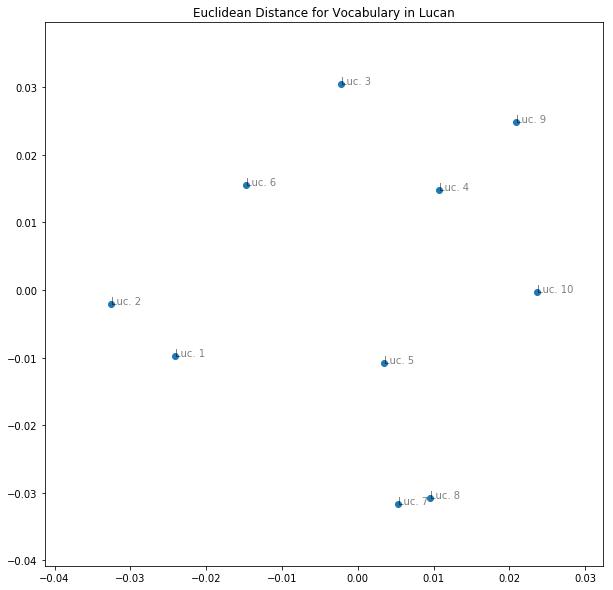

In [93]:
# Create scatterplot

plt.figure(figsize=(10,10))
plt.title('Euclidean Distance for Vocabulary in Lucan')
plt.scatter(xs, ys, cmap='spring')
for x, y, name in zip(xs, ys, lucan_titles):
    plt.text(x,y,name,alpha=0.5,fontsize=10)
plt.show()

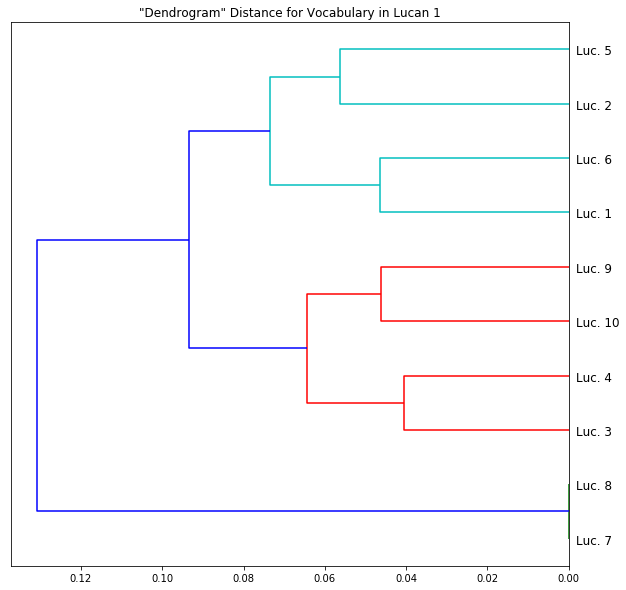

In [94]:
# We can view these distance measures as a branching tree as well

from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist)

plt.figure(figsize=(10,10))
plt.title('"Dendrogram" Distance for Vocabulary in Lucan 1')
dendrogram(linkage_matrix, orientation="left", labels=lucan_titles, leaf_font_size=12);
plt.show()

## Visualizing topics

In [95]:
# Get Latin stopword list

from cltk.stop.latin.stops import STOPS_LIST as latin_stops

In [96]:
latin_stops = latin_stops[:91]
latin_stops.extend(['que'])
print(latin_stops)

['ab', 'ac', 'ad', 'adhic', 'aliqui', 'aliquis', 'an', 'ante', 'apud', 'at', 'atque', 'aut', 'autem', 'cum', 'cur', 'de', 'deinde', 'dum', 'ego', 'enim', 'ergo', 'es', 'est', 'et', 'etiam', 'etsi', 'ex', 'fio', 'haud', 'hic', 'iam', 'idem', 'igitur', 'ille', 'in', 'infra', 'inter', 'interim', 'ipse', 'is', 'ita', 'magis', 'modo', 'mox', 'nam', 'ne', 'nec', 'necque', 'neque', 'nisi', 'non', 'nos', 'o', 'ob', 'per', 'possum', 'post', 'pro', 'quae', 'quam', 'quare', 'qui', 'quia', 'quicumque', 'quidem', 'quilibet', 'quis', 'quisnam', 'quisquam', 'quisque', 'quisquis', 'quo', 'quoniam', 'sed', 'si', 'sic', 'sive', 'sub', 'sui', 'sum', 'super', 'suus', 'tam', 'tamen', 'trans', 'tu', 'tum', 'ubi', 'uel', 'uero', 'unus', 'que']


In [112]:
import sklearn.feature_extraction.text as text
vectorizer = text.CountVectorizer(input='content', stop_words=latin_stops, min_df=2) # Note cutoff of two words
dtm = vectorizer.fit_transform(lucan_lemmatized_texts).toarray()
vocab = np.array(vectorizer.get_feature_names())

dtm.shape

(10, 2952)

In [113]:
from sklearn import decomposition
num_topics = 10
num_top_words = 25
clf = decomposition.NMF(n_components=num_topics, random_state=1) # Using non-negative matrix factorization

# For more on NMF, see https://de.dariah.eu/tatom/topic_model_python.html

doctopic = clf.fit_transform(dtm)

In [114]:
# Create list of words per "topic" (i.e. classifier component)

topic_words = []

for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])


In [115]:
# Scale the document-component matrix such that the component values
# associated with each document sum to one.

doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)

In [116]:
names = np.asarray(lucan_titles)
doctopic_orig = doctopic.copy()

# Create empty matrix
num_groups = len(set(names))
doctopic_grouped = np.zeros((num_groups, num_topics))


In [117]:
# Populate matrix 

for i, name in enumerate(sorted(set(names))):
    doctopic_grouped[i, :] = np.mean(doctopic[names == name, :], axis=0)

doctopic = doctopic_grouped

In [118]:
# Make dataframe for clearer display

df = pd.DataFrame(data=doctopic, index=lucan_titles).round(2)
df

,0,1,2,3,4,5,6,7,8,9
Luc. 1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Luc. 10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Luc. 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Luc. 3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Luc. 4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Luc. 5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Luc. 6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Luc. 7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Luc. 8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Luc. 9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# Show top three topics per document

print("Top NMF topics in...")
for i in range(len(doctopic)):
    top_topics = np.argsort(doctopic[i,:])[::-1][0:3]
    top_topics_str = ' '.join(str(t) for t in top_topics)
    print("{}: {}".format(lucan_titles[i], top_topics_str))

Top NMF topics in...
Luc. 1: 5 4 9
Luc. 10: 7 6 9
Luc. 2: 8 7 6
Luc. 3: 6 5 9
Luc. 4: 0 8 9
Luc. 5: 4 3 9
Luc. 6: 3 2 9
Luc. 7: 1 0 9
Luc. 8: 1 0 9
Luc. 9: 2 1 9


In [120]:
# Show words associated with each document

for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:25])))

Topic 0: bellum hostis ut primus terra omnis campus castrum fatum dux do caesar fero teneo multus nullus magnus miles tellus mors arma pectus manus cado uideo
Topic 1: bellum magnus fatum omnis populus caesar totus do uideo arma fortuna campus ut sanguis nullus romanus fero gens manus multus dies ferrum mundus dux pompeius
Topic 2: magnus terra nullus do omnis fatum harena litus mors tantus uideo ut bellum totus os fero unda solus noster facio primus orbis gens cato teneo
Topic 3: fatum omnis caesar magnus primus arma mors bellum terra umbra ut deus os do mundus unda tantus carmen hostis medius manus fero corpus uox labor
Topic 4: bellum fatum magnus tantus caesar unda deus dux teneo fortuna aequor fero do fluctus mare litus solus terra arma primus omnis pelagus pars manus relinquo
Topic 5: bellum magnus populus fero urbs do orbis longus signum uideo terra caesar roma multus totus nullus arma dux gens ut rapio deus unda regnum teneo
Topic 6: bellum puppis ut ratis aequor populus teneo 

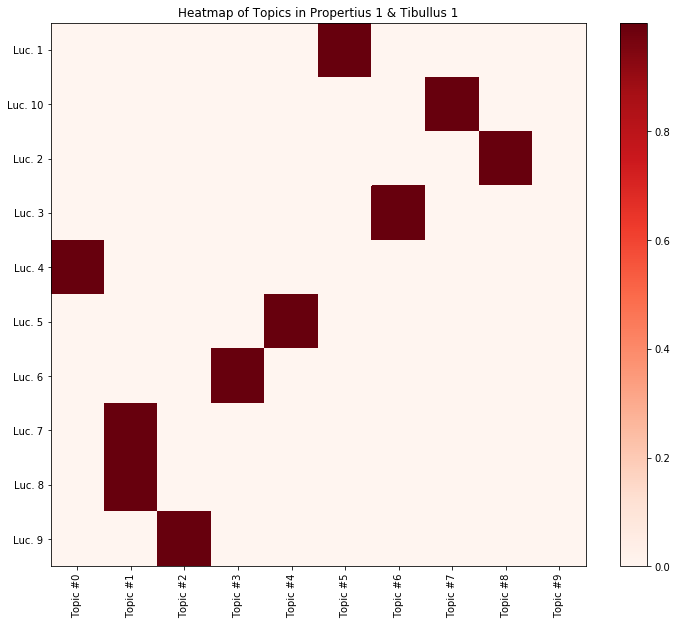

In [121]:
# Make heatmap of topics

N, K = doctopic.shape  # N documents, K topics
topic_labels = ['Topic #{}'.format(k) for k in range(K)]

plt.figure(figsize=(12,10))
plt.title("Heatmap of Topics in Propertius 1 & Tibullus 1")
plt.pcolor(doctopic, norm=None, cmap='Reds')
plt.yticks(np.arange(doctopic.shape[0])+0.5, names);
plt.xticks(np.arange(doctopic.shape[1])+0.5, topic_labels);
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.colorbar(cmap='Reds')
plt.show()

In [122]:
# Show list of words again

for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: bellum hostis ut primus terra omnis campus castrum fatum dux do caesar fero teneo multus
Topic 1: bellum magnus fatum omnis populus caesar totus do uideo arma fortuna campus ut sanguis nullus
Topic 2: magnus terra nullus do omnis fatum harena litus mors tantus uideo ut bellum totus os
Topic 3: fatum omnis caesar magnus primus arma mors bellum terra umbra ut deus os do mundus
Topic 4: bellum fatum magnus tantus caesar unda deus dux teneo fortuna aequor fero do fluctus mare
Topic 5: bellum magnus populus fero urbs do orbis longus signum uideo terra caesar roma multus totus
Topic 6: bellum puppis ut ratis aequor populus teneo magnus robur arma telum unda cado manus multus
Topic 7: caesar magnus tuus populus mundus do fatum bellum terra ut nilus tantus nox domus eo
Topic 8: bellum omnis aequor magnus nullus ut dux unda caesar sanguis fatum fero primus urbs totus
Topic 9: zona fraudo frondeo frigor frigidus fretus frequens frenum freni fremo fraus fraternus fictum frater frango


In [126]:
latin_stops.extend(['cynthia'])

In [127]:
import sklearn.feature_extraction.text as text
vectorizer = text.CountVectorizer(input='content', stop_words=latin_stops, min_df=2) # Note cutoff of two words
dtm = vectorizer.fit_transform(texts).toarray()
vocab = np.array(vectorizer.get_feature_names())

dtm.shape

(33, 1030)

In [128]:
from sklearn import decomposition
num_topics = 10
num_top_words = 25
clf = decomposition.NMF(n_components=num_topics, random_state=1) # Using non-negative matrix factorization

# For more on NMF, see https://de.dariah.eu/tatom/topic_model_python.html

doctopic = clf.fit_transform(dtm)

In [129]:
# Create list of words per "topic" (i.e. classifier component)

topic_words = []

for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])

In [130]:
# Scale the document-component matrix such that the component values
# associated with each document sum to one.

doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)

In [131]:
names = np.asarray(titles)
doctopic_orig = doctopic.copy()

# Create empty matrix
num_groups = len(set(names))
doctopic_grouped = np.zeros((num_groups, num_topics))

In [132]:
# Populate matrix 

for i, name in enumerate(sorted(set(names))):
    doctopic_grouped[i, :] = np.mean(doctopic[names == name, :], axis=0)

doctopic = doctopic_grouped

In [133]:
# Make dataframe for clearer display

df = pd.DataFrame(data=doctopic, index=titles).round(2)

In [134]:
# Show words associated with each document

for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:25])))

Topic 0: amor meus noster tuus puella nullus durus dolor ut cogo ullus eo quaero carmen saepe primus semper labor ocellus longus dico uerbum tantus manus pereo
Topic 1: uolo puer amor do dies aqua uenus doceo primus fero annus capio tener ars nego nudus heu deus cito longus eo tuus uinco terra leuis
Topic 2: meus fero teneo pono tener iners nunc parco fleo domus lio ut sinus do paruus uia seu lectus bonus satis puella contineo aurum exiguus uenio
Topic 3: amor pono neu uenus meus seu totus deus nox teneo dico omnis uolo puella noster solus magicus multus mollis credo iuuenis lumen cantus lio ianua
Topic 4: tuus multus meus deus facio puer aurum amor uerbum miser uolo fleo pes corpus uendo noster nunc saepe munus fero uro peto poena do duco
Topic 5: nunc illic terra amor os mors porto sacer lio do dico longus tuus semper uia unda foris auis precor teneo deus meus puer manus uenio
Topic 6: amor tuus ut duco manus magnus sto procul meus multus credo saepe sanguis timeo dico nunc deus nesc

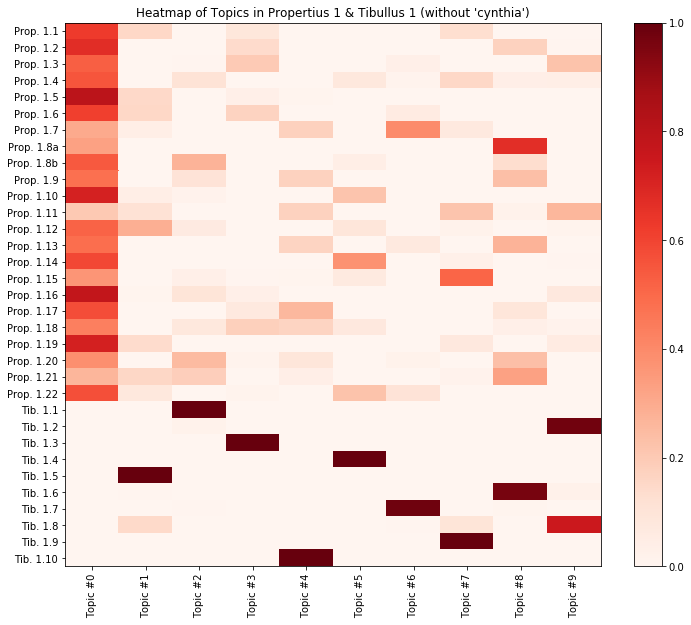

In [135]:
# Make heatmap of topics

N, K = doctopic.shape  # N documents, K topics
topic_labels = ['Topic #{}'.format(k) for k in range(K)]

plt.figure(figsize=(12,10))
plt.title("Heatmap of Topics in Propertius 1 & Tibullus 1 (without 'cynthia')")
plt.pcolor(doctopic, norm=None, cmap='Reds')
plt.yticks(np.arange(doctopic.shape[0])+0.5, names);
plt.xticks(np.arange(doctopic.shape[1])+0.5, topic_labels);
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.colorbar(cmap='Reds')
plt.show()